##### Basic random forest ML model to classify the given text is 'Spam' or 'Not Spam'.


In [1]:
import pandas as pd
import numpy as np
import os
import nltk

In [2]:
cd()

[WinError 2] The system cannot find the file specified: '()'
C:\Users\nikhilk3


In [3]:
msg=pd.read_csv('spam.csv',encoding='latin-1')

In [4]:
msg.head()

,Label,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
msg.columns

Index(['Label', 'Text'], dtype='object')

In [8]:
msg.columns[1]

'Text'

In [10]:
#Basic data check

msg.shape

(5572, 2)

In [13]:
#check data distribution and is there a class imbalance problem
msg['Label'].value_counts()

ham     4825
spam     747
Name: Label, dtype: int64

In [17]:
#missing values
print(format(msg['Label'].isnull().sum()))
print(format(msg['Text'].isnull().sum()))


0
0


In [18]:
pd.set_option('display.max_colwidth',100)

In [19]:
msg.head()

,Label,Text
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives around here though"


Cleaning noise in the data

In [21]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [22]:
def remove_punct(Text):
    Text= "".join([char for char in Text if char not in string.punctuation])
    return Text

In [29]:
msg['Clean_Text'] = msg['Text'].apply(lambda x: remove_punct(x))

In [30]:
print(msg['Clean_Text'])

0       Go until jurong point crazy Available only in bugis n great world la e buffet Cine there got amo...
1                                                                                   Ok lar Joking wif u oni
2       Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive e...
3                                                               U dun say so early hor U c already then say
4                                               Nah I dont think he goes to usf he lives around here though
                                                       ...                                                 
5567    This is the 2nd time we have tried 2 contact u U have won the £750 Pound prize 2 claim is easy c...
5568                                                                    Will ü b going to esplanade fr home
5569                                                     Pity  was in mood for that Soany other suggestions
5570    The guy did some bit

In [31]:
msg.head()

,Label,Text,Clean_Text
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g...",Go until jurong point crazy Available only in bugis n great world la e buffet Cine there got amo...
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive e...
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say
4,ham,"Nah I don't think he goes to usf, he lives around here though",Nah I dont think he goes to usf he lives around here though


Tokenization

In [32]:
import re

In [36]:
def tonkenize(Text):
    tokens= re.split('\W+', Text)
    return tokens

In [41]:
msg['Token_Text'] = msg['Clean_Text'].apply(lambda x:tonkenize(x.lower()))

In [42]:
msg.head()

,Label,Text,Clean_Text,Token_Text
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g...",Go until jurong point crazy Available only in bugis n great world la e buffet Cine there got amo...,"[go, until, jurong, point, crazy, available, only, in, bugis, n, great, world, la, e, buffet, ci..."
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,"[ok, lar, joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive e...,"[free, entry, in, 2, a, wkly, comp, to, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, to..."
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,"[u, dun, say, so, early, hor, u, c, already, then, say]"
4,ham,"Nah I don't think he goes to usf, he lives around here though",Nah I dont think he goes to usf he lives around here though,"[nah, i, dont, think, he, goes, to, usf, he, lives, around, here, though]"


In [47]:
re.split('\W','My name is... Bob')

['My', 'name', 'is', '', '', '', 'Bob']

Remove Stopwords

In [49]:
import nltk

In [63]:
stopwords=nltk.corpus.stopwords.words('english')

In [69]:
def remove_stopwords(tokenized_text):
    Text=[word for word in tokenized_text if word not in stopwords]
    return Text

In [70]:
msg['Text_Without_Stopwords']=msg['Token_Text'].apply(lambda x: remove_stopwords(x))

In [71]:
msg.head()

,Label,Text,Clean_Text,Token_Text,Text_Without_Stopwords
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g...",Go until jurong point crazy Available only in bugis n great world la e buffet Cine there got amo...,"[go, until, jurong, point, crazy, available, only, in, bugis, n, great, world, la, e, buffet, ci...","[go, jurong, point, crazy, available, bugis, n, great, world, la, e, buffet, cine, got, amore, wat]"
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive e...,"[free, entry, in, 2, a, wkly, comp, to, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, to...","[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv..."
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,"[u, dun, say, so, early, hor, u, c, already, then, say]","[u, dun, say, early, hor, u, c, already, say]"
4,ham,"Nah I don't think he goes to usf, he lives around here though",Nah I dont think he goes to usf he lives around here though,"[nah, i, dont, think, he, goes, to, usf, he, lives, around, here, though]","[nah, dont, think, goes, usf, lives, around, though]"


In [72]:
#checking function

print('Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'.lower())

print("\n",tonkenize('Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'.lower()))

print("\n",remove_stopwords(tonkenize('Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'.lower())))

go until jurong point, crazy.. available only in bugis n great world la e buffet... cine there got amore wat...

 ['go', 'until', 'jurong', 'point', 'crazy', 'available', 'only', 'in', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', 'cine', 'there', 'got', 'amore', 'wat', '']

 ['go', 'jurong', 'point', 'crazy', 'available', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', 'cine', 'got', 'amore', 'wat', '']


Converting text into numeric format to pass in ML model

TF IDF
Term Frequency - Inverse Document Frequency

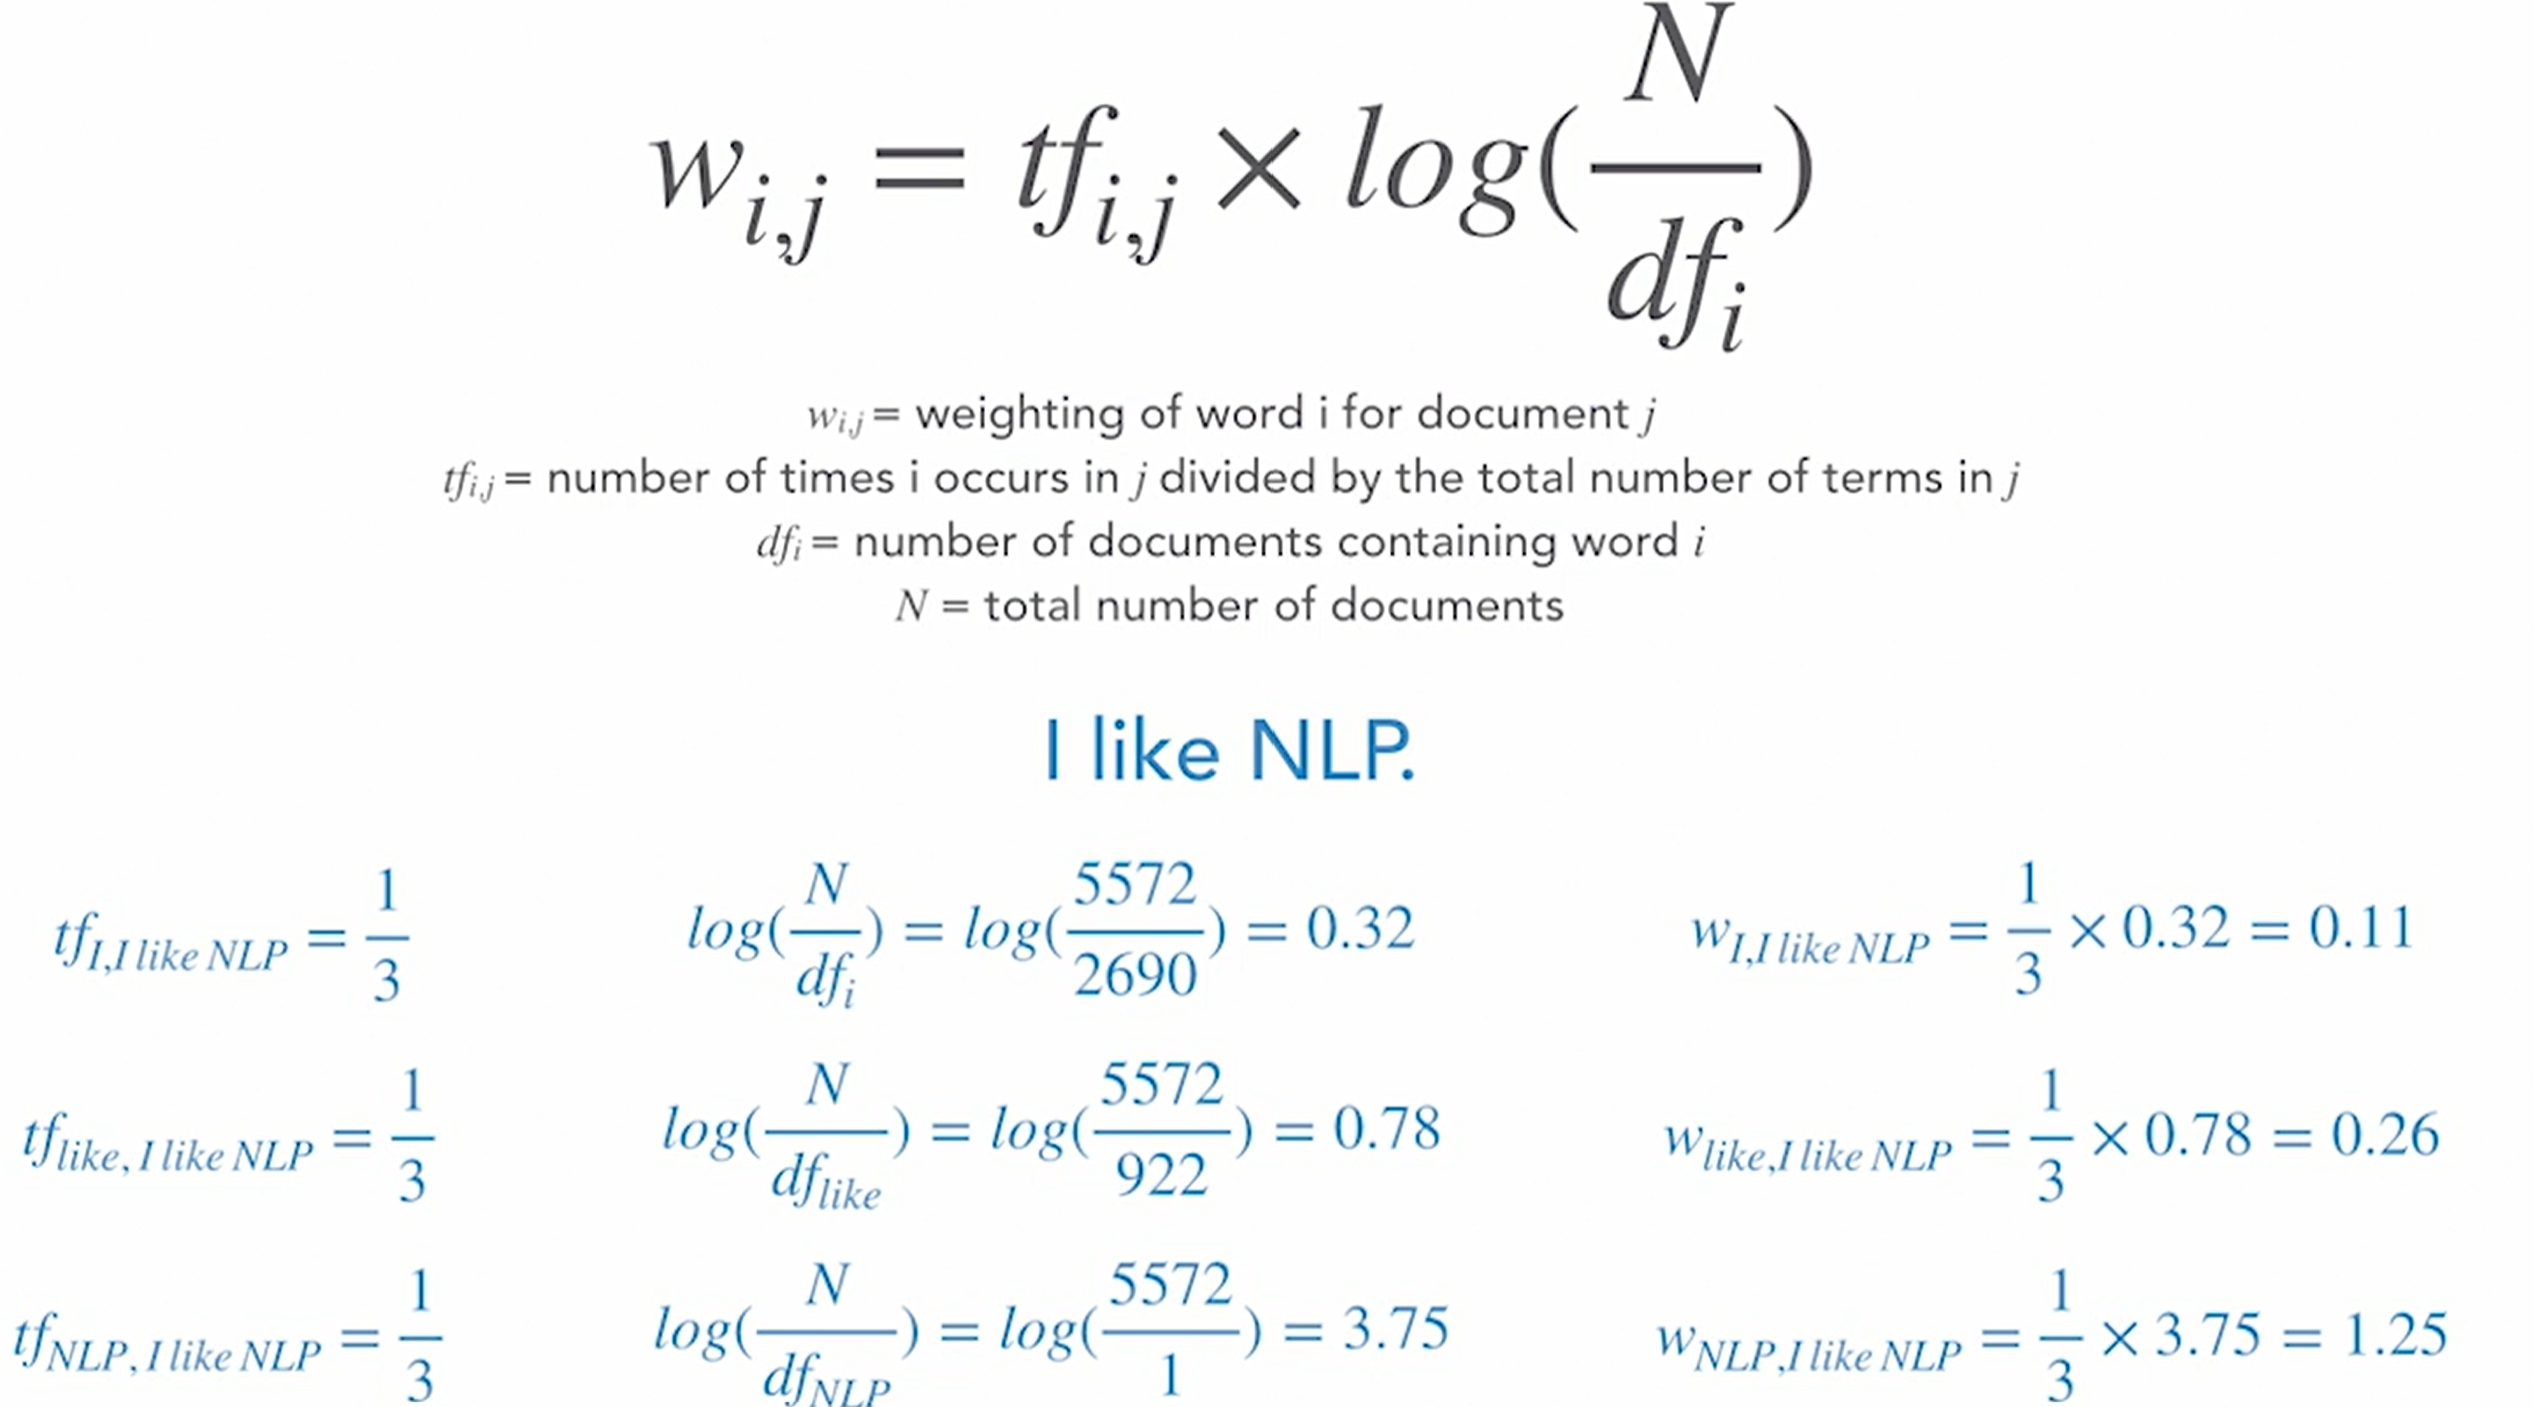

In [78]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [80]:
tf_idf= TfidfVectorizer(analyzer=remove_stopwords)

In [84]:
X_tfidf=tf_idf.fit_transform(msg['Text_Without_Stopwords'])
print(X_tfidf.shape)

(5572, 9445)


In [87]:
print(tf_idf.get_feature_names_out())

['' '0' '008704050406' ... 'é' 'ü' 'üll']


In [88]:
#sparse matrix has been created

X_tfidf

<5572x9445 sparse matrix of type '<class 'numpy.float64'>'
	with 50458 stored elements in Compressed Sparse Row format>

#preparing for data model

In [89]:
X_ft=pd.DataFrame(X_tfidf.toarray())

In [90]:
X_ft.head()

,0,1,2,3,4,5,6,7,8,9,...,9435,9436,9437,9438,9439,9440,9441,9442,9443,9444
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#applying Random Forest

In [91]:
from sklearn.ensemble import RandomForestClassifier

In [93]:
from sklearn.metrics import precision_score, recall_score
from sklearn.model_selection import train_test_split

#spliting the data

In [96]:
X_train,X_test, y_train, y_test = train_test_split(X_ft,
                                                  msg['Label'],
                                                  test_size=0.2)

#Fit a basic random forest model

In [98]:
rf=RandomForestClassifier()
rf_model=rf.fit(X_train,y_train)

In [99]:
#model prediction

y_pred=rf_model.predict(X_test)

In [100]:
precision=precision_score(y_test,y_pred, pos_label='spam')
recall=recall_score(y_test,y_pred,pos_label='spam')

print('Precision: {} / Recall: {}'.format(round(precision,3),round(recall,3)))

Precision: 1.0 / Recall: 0.887
